In [4]:
import pandas as pd
import numpy as np
import requests

In [37]:
ra = pd.read_csv('real_assets.csv', sep=';', decimal=',')
ra = ra[(ra['attributes.start_date'].notnull()) & (ra['attributes.end_date'].isnull())].reset_index(drop=True)
ra

,id,type,attributes.name,attributes.symbol,attributes.serie,attributes.start_date,attributes.end_date,attributes.previous_asset_id,attributes.conceptual_asset_id,attributes.last_day.book_value,...,attributes.last_day.volume,attributes.last_day.dividend,attributes.last_day.split,attributes.last_day.dividend_distribution_factor,attributes.last_day.rate,attributes.last_day.dirty_price,attributes.last_day.price_as_percentage_of_par_value,attributes.last_day.duration,attributes.last_day.yield_to_maturity,attributes.last_day.variable_fee
0,8320,real_asset,QUEST GLOBAL DEBT FONDO DE INVERSIÓN,FINV-9503-B,B,2019-11-12,NaN,NaN,1575.0,1297.8309,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8319,real_asset,QUEST GLOBAL DEBT FONDO DE INVERSIÓN,FINV-9503-A,A,2017-11-02,NaN,NaN,1575.0,1564.5072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18987,real_asset,FONDO DE INVERSION SANTANDER DEUDA PRIVADA INT...,FINV-10407-A,A,2023-03-27,NaN,NaN,4208.0,100.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18988,real_asset,FONDO DE INVERSION SANTANDER DEUDA PRIVADA INT...,FINV-10407-B,B,2023-03-27,NaN,NaN,4208.0,100.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18856,real_asset,FONDO MUTUO BICE ESTRUCTURADO UF V,FFMM-BICE-10430-APV,APV,2023-03-15,NaN,NaN,4142.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,9524,real_asset,FONDO MUTUO COMPASS ACCIONES CHILENAS,FFMM-COMPASS-9362-A,A,2016-08-25,NaN,NaN,1750.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2620,15110,real_asset,FONDO MUTUO COMPASS ACCIONES CHILENAS,FFMM-COMPASS-9362-C,C,2020-07-14,NaN,NaN,1750.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2621,9525,real_asset,FONDO MUTUO COMPASS ACCIONES CHILENAS,FFMM-COMPASS-9362-B,B,2016-08-23,NaN,NaN,1750.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2622,17060,real_asset,FONDO MUTUO COMPASS ACCIONES CHILENAS,FFMM-COMPASS-9362-CG,CG,2022-06-30,NaN,NaN,1750.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
ra[ra.index.isin([186,187,188])]

,id,type,attributes.name,attributes.symbol,attributes.serie,attributes.start_date,attributes.end_date,attributes.previous_asset_id,attributes.conceptual_asset_id,attributes.last_day.book_value,...,attributes.last_day.volume,attributes.last_day.dividend,attributes.last_day.split,attributes.last_day.dividend_distribution_factor,attributes.last_day.rate,attributes.last_day.dirty_price,attributes.last_day.price_as_percentage_of_par_value,attributes.last_day.duration,attributes.last_day.yield_to_maturity,attributes.last_day.variable_fee
186,16019,real_asset,FONDO MUTUO ITAU COMPASS ACCIONES LATINOAMERIC...,FFMM-ITAU-9926-F2,F2,2020-12-29,NaN,NaN,2892.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,16021,real_asset,FONDO MUTUO ITAU COMPASS ACCIONES LATINOAMERIC...,FFMM-ITAU-9926-IT,IT,2020-09-08,NaN,NaN,2892.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,16006,real_asset,FONDO DE INVERSIÓN TRONADOR DEUDA PRIVADA,FINV-9918-UNICA,UNICA,2020-08-27,NaN,NaN,2889.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# assets = pd.DataFrame()
for ix in ra.index[188:]:
    try:
        symbol = ra.loc[ix, 'attributes.symbol']
        id = str(ra.loc[ix, 'id'])
        start_date = str(ra.loc[ix, 'attributes.start_date'])
        url = 'https://fintual.cl/api/real_assets/'
        data_to_ask= {
            'from_date': start_date,
            'to_date': '2024-08-20'
        }

        response = requests.get(url + id + '/days?', data=data_to_ask)
        json = response.json()
        df = pd.json_normalize(json['data'])
        df = df[['attributes.date', 'attributes.net_asset_value']]
        df['attributes.net_asset_value'] = df['attributes.net_asset_value'].astype(np.float64)
        df['symbol'] = symbol
        df['id'] = id
        df['variacion'] = df['attributes.net_asset_value'].pct_change().fillna(0)
        assets = pd.concat([assets, df])
    except:
        print(ix)

assets = assets.reset_index(drop=True)
assets

188
436
437
804
805
806
807
824
825
826
827
841
842
843
844
845
846


,attributes.date,attributes.net_asset_value,symbol,id,variacion
0,2019-11-13,1033.2100,FINV-9503-B,8320,0.000000
1,2019-11-14,1042.0403,FINV-9503-B,8320,0.008546
2,2019-11-15,1017.9197,FINV-9503-B,8320,-0.023147
3,2019-11-16,1017.8634,FINV-9503-B,8320,-0.000055
4,2019-11-17,1017.8071,FINV-9503-B,8320,-0.000055
...,...,...,...,...,...
6530577,2024-08-18,1313.0384,FFMM-COMPASS-9362-CG,17060,-0.000015
6530578,2024-08-19,1311.3652,FFMM-COMPASS-9362-CG,17060,-0.001274
6530579,2024-08-20,1312.7955,FFMM-COMPASS-9362-CG,17060,0.001091
6530580,2024-08-19,1000.0043,FFMM-SCOTIA-10661-UNICA,22521,0.000000


In [41]:
assets.to_csv('assets.csv', sep=';', decimal=',', index=False)

In [42]:
assets.to_parquet('assets.parquet.gzip', index=False, compression='gzip')

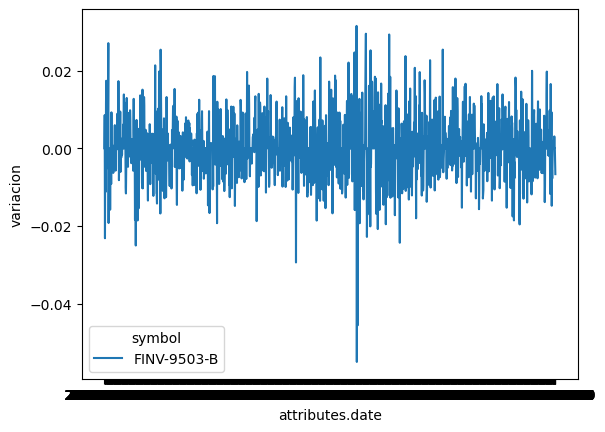

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=assets, x='attributes.date', y='variacion', hue='symbol', )
plt.show()